<a href="https://colab.research.google.com/github/dkvasnicka/data-notebooks/blob/main/ipynb/rolling_resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Making sense of rolling resistance data from BRR.com
====

Measurements on BRR.com are done using pressures that are not relevant for any common riding scenario. The pressures do not correspond to values suggested by widely used and battle-proven tire pressure calculators like Silca. To see how much the tires _truly_ differ in RR we have to interpolate from BRR data for correct pressures specified for various surfaces.

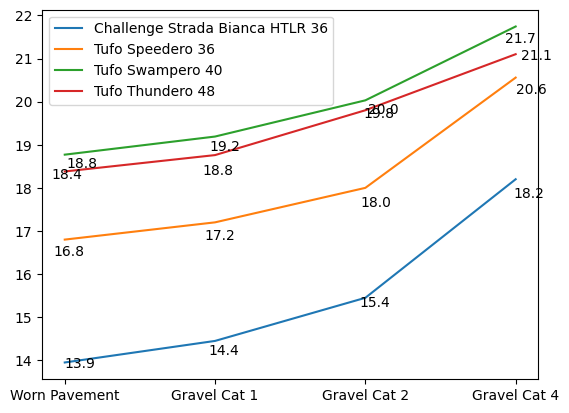

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# BRR data
brr = {
    # "Hutchinson Caracal Race TLR 40": {
    #     "p": [1.7, 2.3, 2.9, 3.4],
    #     "w": [16.7, 13.6, 12, 11.4],
    #     "silca": [
    #         2.7, # worn pavement
    #         2.575, # cat 1
    #         2.3, # cat 2
    #         1.85 # cat 4
    #     ]
    # },
    # "GP5000 TL 32": {
    #     "p": [2.3, 3.0, 3.8, 4.6],
    #     "w": [19.8, 16, 13.5, 11.9],
    #     "silca": [
    #         4.275, # worn pavement
    #         4.1, # cat 1
    #         3.675, # cat 2
    #         2.925 # cat 4
    #     ]
    # },
    "Challenge Strada Bianca HTLR 36": {
        "p": [2.1, 2.8, 3.4, 4.1],
        "w": [19.2, 15.7, 13.7, 12.9],
        "silca": [
            np.average([3.25, 3.4]),
            np.average([3.25, 3.1]),
            np.average([2.95, 2.8]),
            np.average([2.35, 2.25])
        ]
    },
    "Tufo Speedero 36": {
        "p": [2.1, 2.8, 3.4, 4.1],
        "w": [21.5, 18.2, 16.6, 15.7],
        "silca": [
            np.average([3.25, 3.4]),
            np.average([3.25, 3.1]),
            np.average([2.95, 2.8]),
            np.average([2.35, 2.25])
        ]
    },
    "Tufo Swampero 40": {
        "p": [1.9, 2.6, 3.1, 3.7],
        "w": [22.4, 20.1, 18.7, 18.4],
        "silca": [
            np.average([3.15, 3]),
            np.average([3, 2.85]),
            np.average([2.7, 2.55]),
            np.average([2.15, 2.05])
        ]
    },
    # "Vittoria Corsa Pro Control 34": {
    #     "p": [2.3, 3.0, 3.8, 4.6],
    #     "w": [26.9, 21.8, 18.9, 17.2],
    #     "silca": [
    #         np.average([4.15, 3.95]),
    #         np.average([3.95, 3.8]),
    #         np.average([3.55, 3.4]),
    #         np.average([2.85, 2.7])
    #     ]
    # },
    "Tufo Thundero 48": {
        "p": [1.6, 2.1, 2.6, 3.2],
        "w": [21.1, 18.5, 17.3, 16.3],
        "silca": [
            np.average([2.2, 2.1]),
            np.average([2.1, 2]),
            np.average([1.9, 1.8]),
            np.average([1.5, 1.45])
        ]
    }
}

surfaces = [
    "Worn Pavement",
    "Gravel Cat 1",
    "Gravel Cat 2",
    "Gravel Cat 4",
]

for tire, data in brr.items():
  correct_rr = np.interp(data["silca"], data["p"], data["w"])
  plt.plot(surfaces, correct_rr, label=tire)
  for i, txt in enumerate(correct_rr):
      plt.annotate(f"{txt:.1f}", (surfaces[i], correct_rr[i]),
                   textcoords="offset points",
                   xytext=(random.random() * 15, random.random() * -15), ha='center')

plt.legend()
plt.show()